# Dataclasses in Python

This tutorial assumes that you already know the basics of [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming) in general and have a working knowledge of Python. If you are not familiar with object-oriented programming, you should read the tutorial on Python classes first.

Useful links: 
https://realpython.com/python3-object-oriented-programming/


## What are dataclasses?

Dataclasses are a way to create classes that are lightweight and have a lot of the functionality of a class without the overhead of a class. They are useful for creating classes that are used to store data. They are also useful for creating classes that are used to store data that is used to create other classes. The dataclasses are available through built-in dataclasses module in Python 3.7+.


In [2]:
from dataclasses import dataclass

Let us create a dataclass that represents a bond. This can be achieved as follows:

In [4]:
@dataclass
class Bond:
  """
  The dataclass that represents a bond.
  
  ## Parameters:
  rate: The rate of interest on the bond.
  duration: The duration of the bond.
  face_value: The face value of the bond. 
  
  ## Properties:
  price: The present value of the future cash flows. 
  """  
  rate: float
  duration: float
  face_value: float
  
  @property
  def price(self) -> float:    
    return self.face_value / (1 + self.rate) ** self.duration

The property decorator is used to store a computed attribute within a dataclass. The same code logic as above but without the dataclass decorator.

In [ ]:
class Bond:
  def __init__(self) -> None:
    self.rate = 0.0
    self.duration = 0.0
    self.face_value = 0.0
  
  def CalculatePresentValue(self) -> None:
    self.price = self.face_value / (1 + self.rate) ** self.duration
  

## Why should you care about dataclasses when you have simpler tabular datastructures like Pandas dataframes?
One of the most powerful features with the Python dataclasses are that they support many features of object oriented programming. This would become clearer with the example of mortgages below. Mortgages are also a subclass of bonds, therefore we will simply inherit Bonds into a new dataclass called mortgages.

In [110]:
@dataclass
class Mortgage (Bond):
  pass

Now you can probably see that we have a structure. We have implemented programmatically that a mortgage is actually a bond and it can also have additional features. Mortgages will also have attributes that are specific to mortgages. We will add the down payment and the monthly payment to the mortgage class. Let us add those features and define the mortgage class again.

In [123]:
@dataclass
class Mortgage(Bond):  
  down_payment: float
  @property
  def monthly_payment(self) -> float:
    monthly_rate = self.rate / 12
    return (self.face_value - self.down_payment) * monthly_rate / (1 - (1 + monthly_rate) ** (-self.duration * 12)) 
  # We also need to override the price property. The price of the mortgage is the present value of the monthly payments plus the down payment. This is equal to the face value or the amount borrowed.
  @property
  def price(self):
    return self.face_value

Now let us create a mortgage object. Note that we need to supply 4 parameters: the rate, duration, face value and down payment. Three of these parameters are inherited from the Bond class. The down payment is a new parameter that is specific to the Mortgage class. Mortgage class also has an additional property attribute called monthly payment.

In [124]:
fixed_mortgage = Mortgage(rate=0.05, duration=30, face_value=100000, down_payment=20000)
fixed_mortgage.monthly_payment

429.4572984097118

But mortgages can either be fixed rate or floating rate. We will now inherit from mortgage and create a floating rate mortgage. Now you could be probably getting a feel of how powerful dataclasses could be.

In [114]:

@dataclass
class FloatingRateMortgage(Mortgage):  
  @property
  def monthly_payment(self) -> float:
      if(len(self.rate) != self.duration * 12):
          raise ValueError("The number of monthly rates is not equal to the number of months in the mortgage duration.")
      # Now we will have a list of monthly payments. We will have to calculate the monthly payment for each month based on the monthly rate.
      return [(self.face_value - self.down_payment) * (rate/12) / (1 - (1 + (rate/12)) ** (-self.duration * 12)) for rate in self.rate]   


We will now create a floating rate mortgage object. We will assume that the monthly annualised rate of interest is [uniformly distributed](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) between 4% and 12%. Note that the rate of interest is annualised and this annualised rate changes every month.

In [115]:
from numpy.random import uniform
floating_mortgage = FloatingRateMortgage(duration=30, face_value=100000, down_payment=20000, rate=uniform(0.04, 0.12, 30*12))
floating_mortgage.monthly_payment[0:12] # We will print the first year of monthly payments for sake of brevity.

[530.9941898888909,
 775.2555352740925,
 439.5470626720084,
 761.7033410945966,
 443.19156205169156,
 610.4539485787051,
 475.38375837483676,
 595.064992373187,
 507.8541106689975,
 471.5091034239094,
 547.3519518483176,
 390.21903287103135]

In the above example, we assumed that the rate of interest is uniformly distributed between 4% and 12%. This is quite unrealistic, but that is not the point. The point is to show, how powerful and convenient datatclasses can be. We used dataclasses to create a class (eg: Mortgage) that inherits from another class (eg: Bond) and add additional attributes and methods to the inherited class. By the way, you can also use your own interest rates or source the list of interest rates from any API such as FRED. You can also extend this code to create a useful application that would simulate different interest rate environments and show you how the mortgage payments would change or maybe something else (imagination is the limit!). That is the beauty of Python! You can do powerful things with simple and readable tools.

## Data Wrangling with dataclasses

Now let us look at other features that dataclasses provide. Suppose you are a small bank and you have given out 5 housing loans, with amounts of $10000, $50000, $60000, $90000 and $100000 respectively. All of these loans have a fixed interest rate of 5% and and a fixed duration of 30 years. The down payment for each loan is 20% of the loan amount.

In [116]:
loans = [10000, 50000, 60000, 90000, 100000]
mortgage_portfolio = [Mortgage(rate=0.05, duration=30, face_value=face_value, down_payment=0.2 * face_value) for face_value in loans]
mortgage_portfolio

[Mortgage(rate=0.05, duration=30, face_value=10000, down_payment=2000.0),
 Mortgage(rate=0.05, duration=30, face_value=50000, down_payment=10000.0),
 Mortgage(rate=0.05, duration=30, face_value=60000, down_payment=12000.0),
 Mortgage(rate=0.05, duration=30, face_value=90000, down_payment=18000.0),
 Mortgage(rate=0.05, duration=30, face_value=100000, down_payment=20000.0)]

We have created a list of mortgage objects. Suppose we want to filter out the mortgages that have a face value greater than $50,000. Filtering the list of dataclasses is same as filtering any other list.

In [117]:
filtered_portfolio = list(filter(lambda loan: loan.face_value > 50000, mortgage_portfolio))
filtered_portfolio

[Mortgage(rate=0.05, duration=30, face_value=60000, down_payment=12000.0),
 Mortgage(rate=0.05, duration=30, face_value=90000, down_payment=18000.0),
 Mortgage(rate=0.05, duration=30, face_value=100000, down_payment=20000.0)]

Or maybe you want to filter only those portfolios that have a monthly payment greater than $100

In [118]:
filtered_portfolio = list(filter(lambda loan: loan.monthly_payment > 100, mortgage_portfolio))
filtered_portfolio

[Mortgage(rate=0.05, duration=30, face_value=50000, down_payment=10000.0),
 Mortgage(rate=0.05, duration=30, face_value=60000, down_payment=12000.0),
 Mortgage(rate=0.05, duration=30, face_value=90000, down_payment=18000.0),
 Mortgage(rate=0.05, duration=30, face_value=100000, down_payment=20000.0)]

We can also sort dataclasses using the sorted function. We will sort the mortgage portfolio based on the monthly payment in descending order.

In [90]:
sorted_portfolio = sorted(mortgage_portfolio, key=lambda loan: loan.monthly_payment, reverse=True)
sorted_portfolio

[Mortgage(rate=0.05, duration=30, face_value=100000, down_payment=20000.0),
 Mortgage(rate=0.05, duration=30, face_value=90000, down_payment=18000.0),
 Mortgage(rate=0.05, duration=30, face_value=60000, down_payment=12000.0),
 Mortgage(rate=0.05, duration=30, face_value=50000, down_payment=10000.0),
 Mortgage(rate=0.05, duration=30, face_value=10000, down_payment=2000.0)]

Anything that you can do with python lists, you can do with the list of dataclasses. For example, we can use the map function to add an attribute of amortization schedule to each mortgage object in the portfolio.

Let us define a function that will calculate the amortization schedule for a mortgage.

In [119]:
def CalculateAmortizationSchedule(mortgage: Mortgage) -> list[dict]:
  monthly_rate = mortgage.rate / 12
  monthly_payment = mortgage.monthly_payment
  balance = mortgage.face_value - mortgage.down_payment
  amortization_schedule = []
  for i in range(0, mortgage.duration * 12):
    interest = balance * monthly_rate
    principal = monthly_payment - interest
    balance = balance - principal
    amortization_schedule.append({"period": i+1, "interest":interest, "principal": principal, "unpaid_balance":balance})
  return amortization_schedule

Now let us use the map function to add the amortization schedule to each mortgage object in the portfolio.

In [120]:
for mortgage in mortgage_portfolio:
  mortgage.amortization_schedule = CalculateAmortizationSchedule(mortgage)
mortgage_portfolio[0].amortization_schedule[0:4] # We will print the first four months of the amortization schedule for the first mortgage in the portfolio.

[{'period': 1,
  'interest': 33.333333333333336,
  'principal': 9.612396507637854,
  'unpaid_balance': 7990.387603492362},
 {'period': 2,
  'interest': 33.293281681218176,
  'principal': 9.652448159753014,
  'unpaid_balance': 7980.73515533261},
 {'period': 3,
  'interest': 33.25306314721921,
  'principal': 9.692666693751981,
  'unpaid_balance': 7971.042488638858},
 {'period': 4,
  'interest': 33.21267703599524,
  'principal': 9.733052804975948,
  'unpaid_balance': 7961.309435833882}]

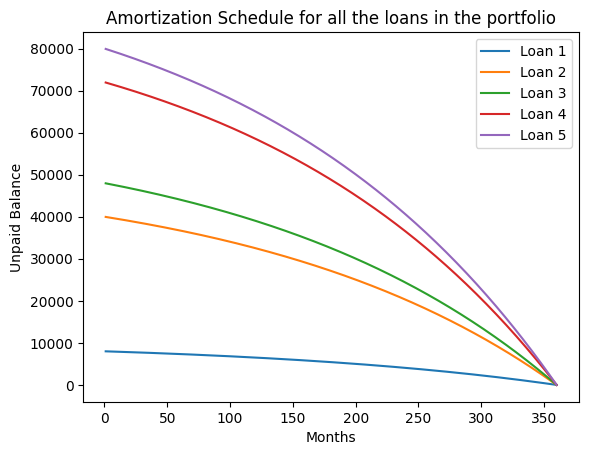

In [121]:
import matplotlib.pyplot as plt
schedule_plots = [plt.plot([schedule["period"] for schedule in mortgage.amortization_schedule], [schedule["unpaid_balance"] for schedule in mortgage.amortization_schedule], label=f"Loan {i+1}") for i, mortgage in enumerate(mortgage_portfolio)]
plt.title("Amortization Schedule for all the loans in the portfolio")
plt.xlabel("Months")
plt.ylabel("Unpaid Balance")
plt.legend()
plt.show()

## Some disadvantages

There are multiple ways to achieve the same thing in Python. Dataclasses are useful but are not a substitute for pandas dataframes. Dataclasses do not have many out-of-the-box features as pandas dataframes provide such as rich support for date-time libraries and plotting. If the data makes more sense in a tabular format, then pandas dataframes are the way to go. For example, if you need time-series features like moving averages, differencing, etc., then do not use dataclasses, unless you are willing to write the code to implement these features.

However, dataclasses are useful when we want to create a simple data structure that is easy to understand and maintain. 

